In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing Necessary Libraries
import cv2
import os
import shutil 
import math
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Function for Formatting Dataset
def FormatDataset(dataset_src, dataset_dest, classes):
    # Making a Copy of Dataset
    new_cropped_dest = [os.path.join(dataset_dest, cls, 'CROPPED') for cls in classes];
    new_complete_dest = [os.path.join(dataset_dest, cls, 'COMPLETE') for cls in classes];
    cropped_src = [ dataset_src + "/im_" + cls + "/im_" + cls + "/CROPPED" for cls in classes ];
    complete_src = [ dataset_src + "/im_" + cls + "/im_" + cls for cls in classes ];
#     for (dest1, dest2) in zip(new_cropped_dest, new_complete_dest):
#         os.makedirs(dest1);
#         os.makedirs(dest2);
#     # Formating Cropped Images
#     for (src,new_dest) in zip(cropped_src, new_cropped_dest):
#         for file in os.listdir(src):
#             filename, file_ext = os.path.splitext(file);
#             if file_ext == '.bmp':
#                 img_des = os.path.join(new_dest, filename + '.jpg');
#                 img = cv2.imread(os.path.join(src, file));
#                 img = cv2.resize(img, (64, 64));
#                 img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0);
#                 img = cv2.blur(img, (2, 2));
#                 cv2.imwrite(img_des ,img);
#     # Formatting Complete Images
#     for (src,new_dest) in zip(complete_src, new_complete_dest):
#         for file in os.listdir(src):
#             filename, file_ext = os.path.splitext(file);
#             if file_ext == '.bmp':
#                 img_des = os.path.join(new_dest, filename + '.jpg');
#                 img = cv2.imread(os.path.join(src, file));
#                 img = cv2.resize(img, (256, 256));
#                 img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0);
#                 img = cv2.blur(img, (2, 2));
#                 cv2.imwrite(img_des ,img);

# Source Location for Dataset
src = r'CervicalCancer';
# Destination Location for Dataset
dest = './CervicalCancer';
# Image Classes
classes = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"];
# Formatting Dataset
FormatDataset(src, dest, classes);

In [10]:
root_dir = "./CervicalCancer"
classes = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"]

def GetDatasetSize(path, classes, main = "CROPPED"):
    num_of_image = {}
    for cls in classes:
        # Counting the Number of Files in the Folder
        num_of_image[cls] = len(os.listdir(os.path.join(path, cls, main)));
    return num_of_image;

print(GetDatasetSize(root_dir, classes, "COMPLETE"));

{'Dyskeratotic': 223, 'Koilocytotic': 238, 'Metaplastic': 271, 'Parabasal': 108, 'Superficial-Intermediate': 126}


### Split the Dataset such that we have
* 70% for Train Data
* 15% for Validation Data
* 15% for Testing Data

In [12]:
# Function for Creating Train / Validation / Test folders (One time use Only)

def TrainValTestSplit(root_dir, classes_dir, main = "CROPPED", val_ratio = 0.15, test_ratio = 0.15):
    for cls in classes_dir:
        src = os.path.join(root_dir, cls, main);

        # Spliting the Files in the Given ratio
        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), int(len(allFileNames)* (1 - test_ratio))])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

        # Printing the Split Details
        print(cls,':')
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

# Preforming Train / Validation / Test Split
root_dir = "./CervicalCancer"               # Dataset Root Folder
classes_dir = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]   # Classes
TrainValTestSplit(root_dir, classes_dir);

Dyskeratotic :
Total images:  814
Training:  569
Validation:  122
Testing:  123
Koilocytotic :
Total images:  826
Training:  578
Validation:  124
Testing:  124
Metaplastic :
Total images:  794
Training:  555
Validation:  119
Testing:  120
Parabasal :
Total images:  788
Training:  551
Validation:  118
Testing:  119
Superficial-Intermediate :
Total images:  832
Training:  582
Validation:  125
Testing:  125


### Building Model 


In [13]:
# Importing Keras for Image Classification
import keras
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [14]:
# CNN Model 

model = Sequential() 
# Convolutional Layer with input shape (64,64,3)
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(64,64,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=5, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       7

### Preparing data using data generator 

In [15]:
# Expand the size of dataset with new transformed images from the original dataset using ImageDataGenerator.
train_datagen = image.ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True)
val_datagen = image.ImageDataGenerator(rescale = 1./255)
test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [16]:
train_data = train_datagen.flow_from_directory(directory= "./train", target_size=(64, 64), batch_size=100, class_mode = 'categorical')

Found 2832 images belonging to 5 classes.


In [17]:
train_data.class_indices

{'Dyskeratotic': 0,
 'Koilocytotic': 1,
 'Metaplastic': 2,
 'Parabasal': 3,
 'Superficial-Intermediate': 4}

In [18]:
val_data = val_datagen.flow_from_directory(directory= "./val", target_size=(64, 64), batch_size=100, class_mode = 'categorical')

Found 608 images belonging to 5 classes.


In [19]:
test_data = test_datagen.flow_from_directory(directory= "./test", target_size=(64, 64), batch_size=100, class_mode = 'categorical',shuffle=False)

Found 609 images belonging to 5 classes.


In [20]:
# Adding Model check point Callback
mc = ModelCheckpoint(filepath="cervical_cancer_best_model.hdf5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto');
call_back = [ mc ];

In [21]:
# Fitting the Model

cnn = model.fit(train_data, 
                  steps_per_epoch= 28, 
                  epochs= 32,
                  validation_data= val_data, 
                  validation_steps= 6,
                  callbacks = call_back )

Epoch 1/32
28/28 [==============================] - ETA: 0s - loss: 0.2392 - accuracy: 0.9169
Epoch 1: val_accuracy improved from -inf to 0.89667, saving model to cervical_cancer_best_model.hdf5
28/28 [==============================] - 26s 877ms/step - loss: 0.2392 - accuracy: 0.9169 - val_loss: 0.2861 - val_accuracy: 0.8967
Epoch 2/32
28/28 [==============================] - ETA: 0s - loss: 0.2310 - accuracy: 0.9187
Epoch 2: val_accuracy improved from 0.89667 to 0.90667, saving model to cervical_cancer_best_model.hdf5
28/28 [==============================] - 30s 1s/step - loss: 0.2310 - accuracy: 0.9187 - val_loss: 0.2906 - val_accuracy: 0.9067
Epoch 3/32
28/28 [==============================] - ETA: 0s - loss: 0.2284 - accuracy: 0.9250
Epoch 3: val_accuracy improved from 0.90667 to 0.91000, saving model to cervical_cancer_best_model.hdf5
28/28 [==============================] - 28s 976ms/step - loss: 0.2284 - accuracy: 0.9250 - val_loss: 0.2785 - val_accuracy: 0.9100
Epoch 4/32
28/28

28/28 [==============================] - 31s 1s/step - loss: 0.1540 - accuracy: 0.9454 - val_loss: 0.2678 - val_accuracy: 0.9167
Epoch 30/32
28/28 [==============================] - ETA: 0s - loss: 0.1528 - accuracy: 0.9422
Epoch 30: val_accuracy did not improve from 0.93000
28/28 [==============================] - 33s 1s/step - loss: 0.1528 - accuracy: 0.9422 - val_loss: 0.2513 - val_accuracy: 0.9183
Epoch 31/32
28/28 [==============================] - ETA: 0s - loss: 0.1658 - accuracy: 0.9436
Epoch 31: val_accuracy did not improve from 0.93000
28/28 [==============================] - 33s 1s/step - loss: 0.1658 - accuracy: 0.9436 - val_loss: 0.2702 - val_accuracy: 0.9033
Epoch 32/32
28/28 [==============================] - ETA: 0s - loss: 0.1302 - accuracy: 0.9550
Epoch 32: val_accuracy did not improve from 0.93000
28/28 [==============================] - 31s 1s/step - loss: 0.1302 - accuracy: 0.9550 - val_loss: 0.2535 - val_accuracy: 0.9167


In [22]:
model.save("cervical_cancer.h5")

In [23]:
# Loading the Best Fit Model 
model = load_model("cervical_cancer.h5")

### Model Accuracy

In [24]:
# Checking the Accuracy of the Model 
accuracy = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of your model is = {accuracy*100} %")

The accuracy of your model is = 93.1034505367279 %


### CONFUSION  MATRIX

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

target_names = []
for key in test_data.class_indices:
    target_names.append(key)

In [26]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

7/7 [==============================] - 1s 163ms/step
Confusion Matrix
Confusion matrix, without normalization


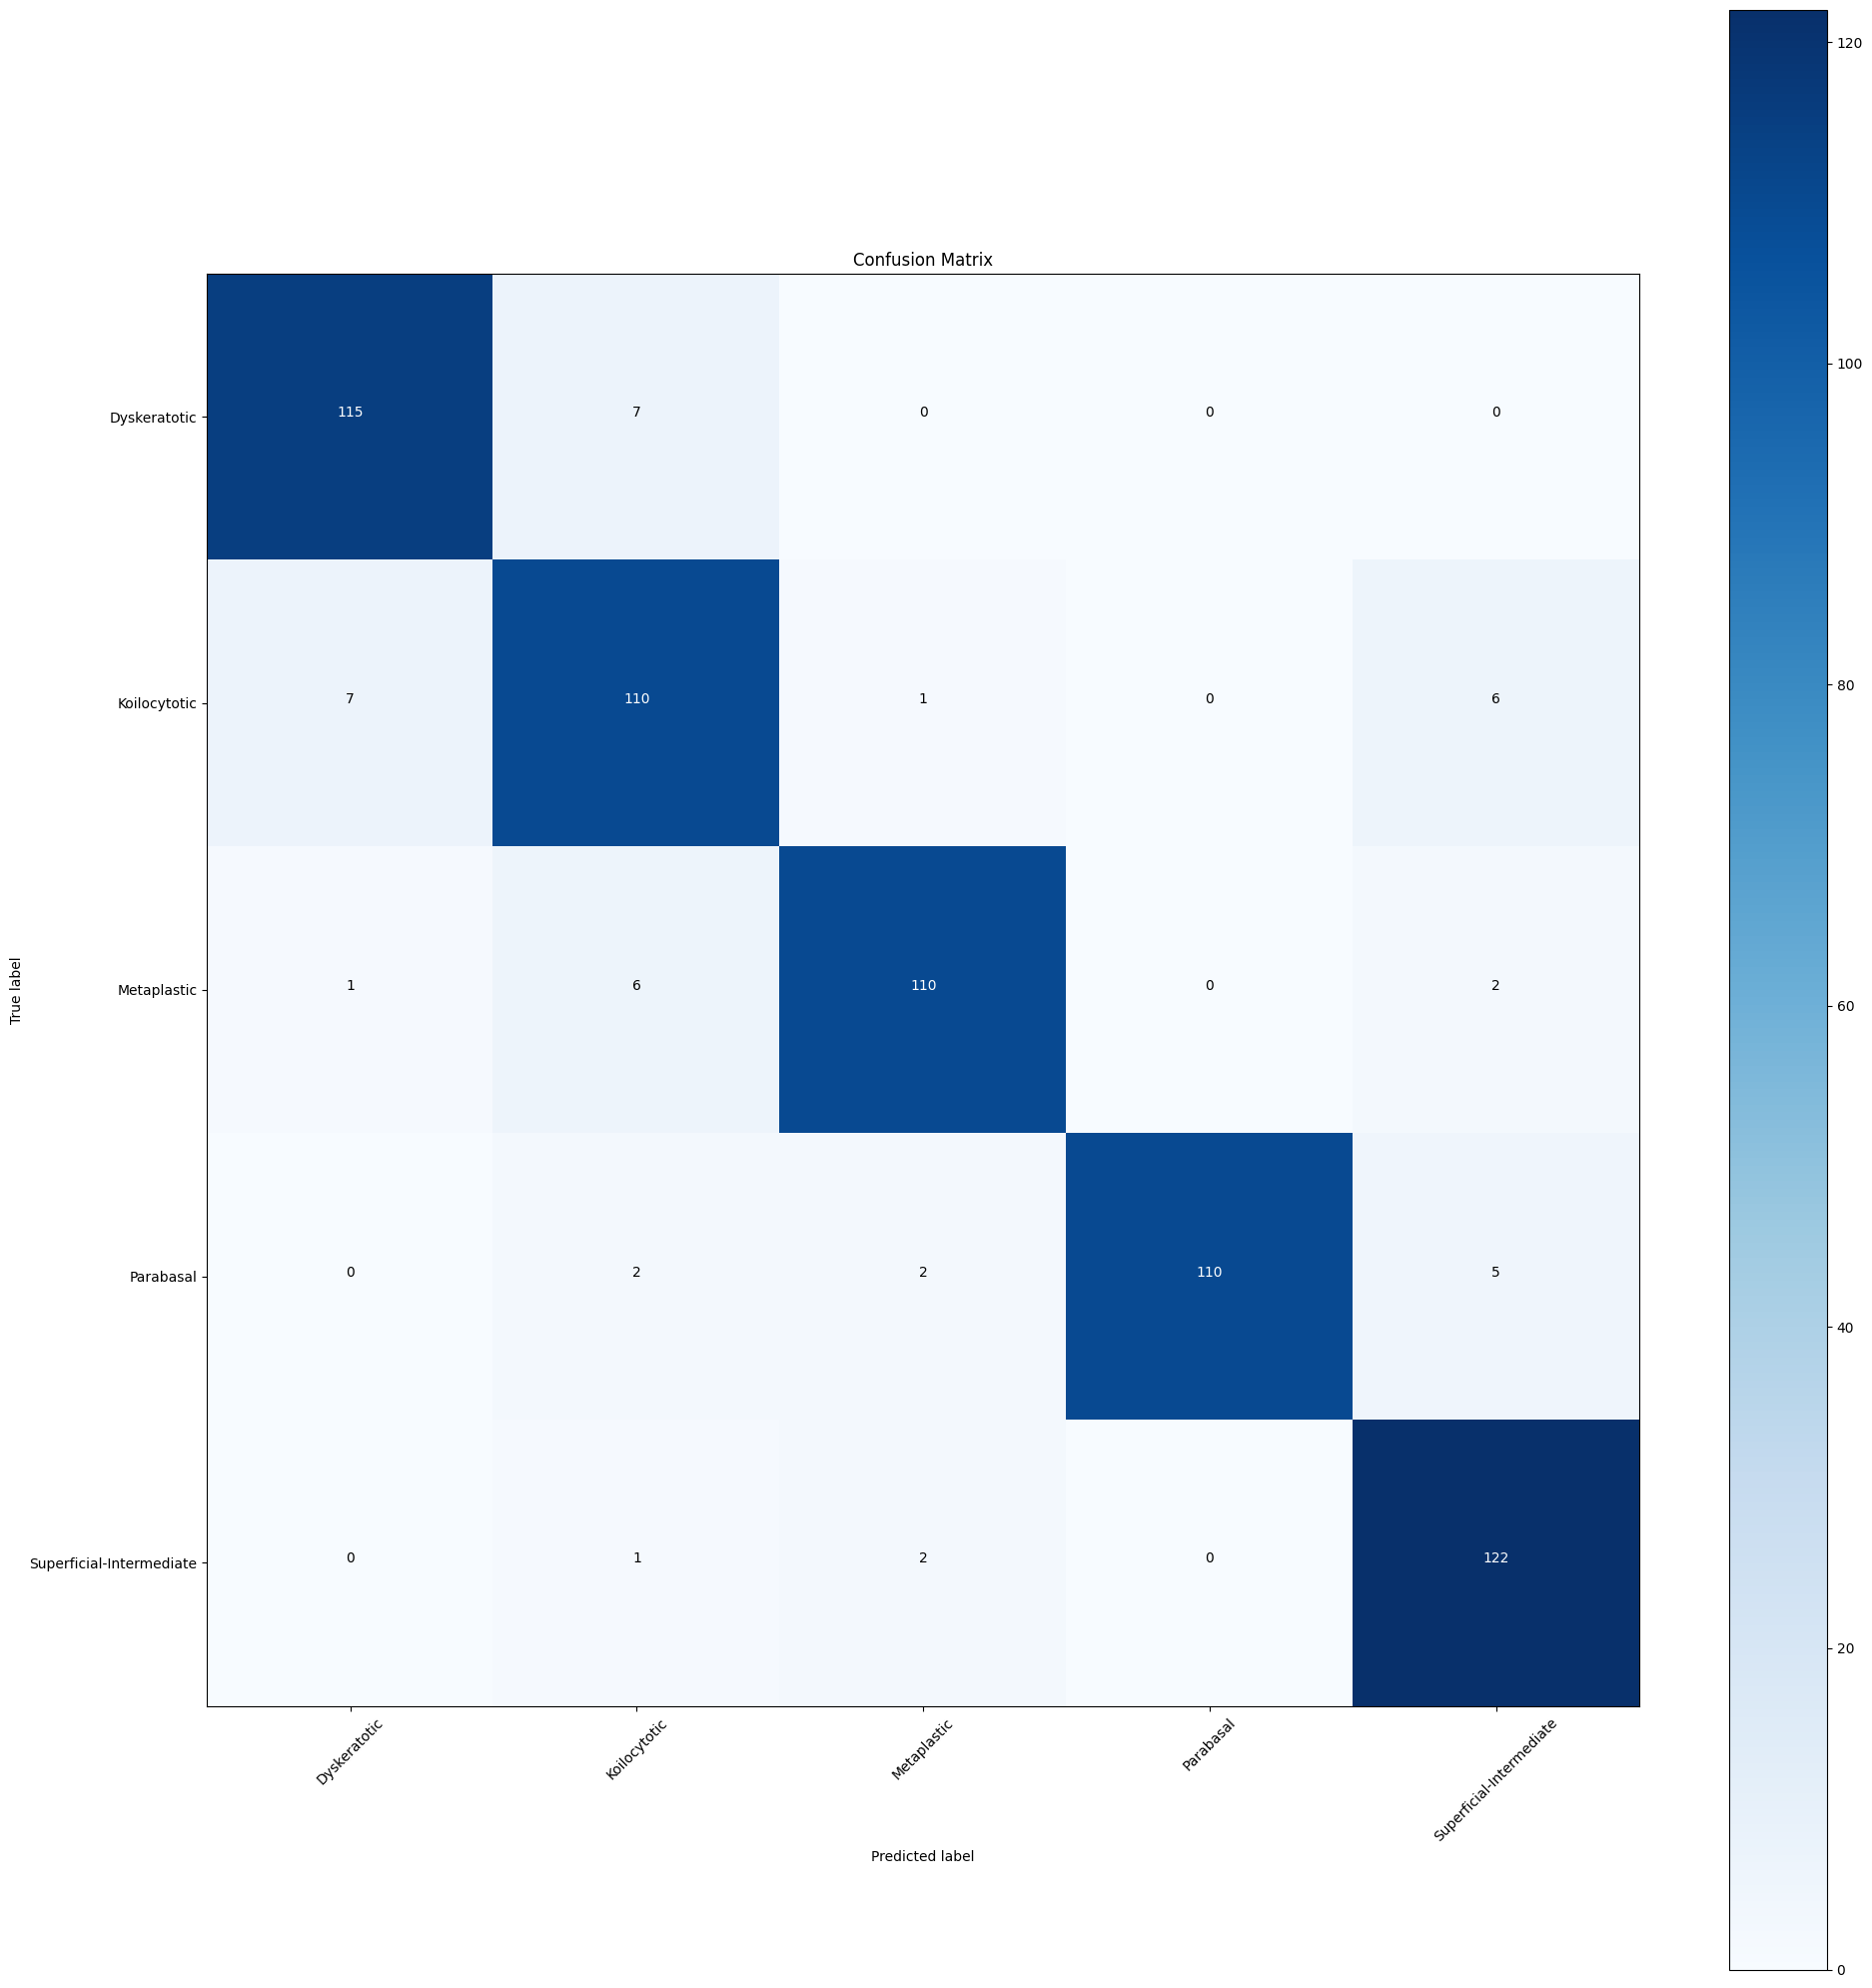

In [27]:
#Confution Matrix and Classification Report
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=-1)
print('Confusion Matrix')
cm=confusion_matrix(test_data.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [28]:
h =  cnn.history;
h.keys();### Model Accuracy

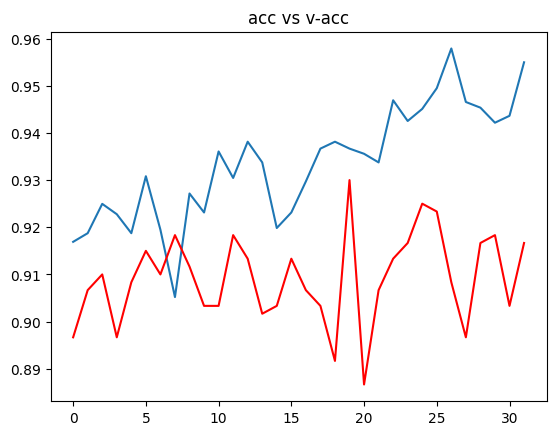

In [29]:
# Ploting Accuracy In Training Set & Validation Set

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

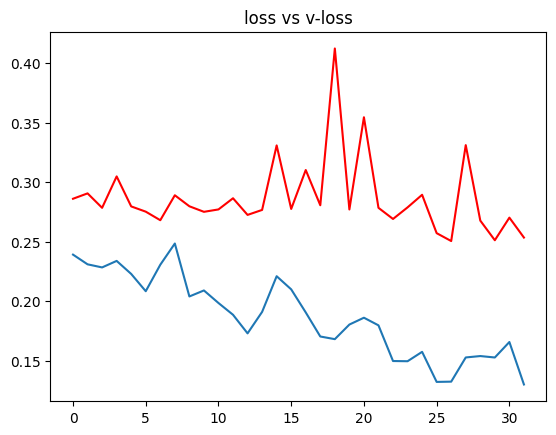

In [30]:
# Ploting Loss In Training Set & Validation Set

plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
def cancerPrediction(path):
    classes_dir = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"]
    # Loading Image
    img = tf.keras.utils.load_img(path, target_size=(64,64))
    # Normalizing Image
    norm_img =  tf.keras.utils.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    # Getting Predictions
    pred = np.argmax(model.predict(input_arr_img))
    # Printing Model Prediction
    print(classes_dir[pred])

path = "C:/Users/indna/Desktop/cervical cancer/CervicalCancer/Koilocytotic/CROPPED/001_01.jpg"
cancerPrediction(path)